In [1]:
import pandas as pd
import datetime, timedelta
import os

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df_berlin = pd.read_csv('processed/berlin_cleaned.csv')

In [3]:
df_berlin

,day,weather_code,humidity,temperature,feels_like,rain,snowfall,sunshine_hours,daylight_hours,month_year,year,month_num,season,day_of_week,weather_description
0,2015-07-15,3,71,18.3,17.6,0.0,0.0,11.526564,16.363972,2015-07,2015,7,summer,Wednesday,Cloudy
1,2015-07-16,51,67,20.3,20.5,0.1,0.0,12.943117,16.325992,2015-07,2015,7,summer,Thursday,Light Drizzle
2,2015-07-17,3,67,23.1,24.1,0.0,0.0,14.145764,16.286950,2015-07,2015,7,summer,Friday,Cloudy
3,2015-07-18,51,67,22.7,23.2,0.3,0.0,14.633294,16.246900,2015-07,2015,7,summer,Saturday,Light Drizzle
4,2015-07-19,63,80,18.7,18.9,11.3,0.0,7.333481,16.205839,2015-07,2015,7,summer,Sunday,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,2025-06-11,51,67,15.8,13.3,1.1,0.0,13.343106,16.756864,2025-06,2025,6,summer,Wednesday,Light Drizzle
3620,2025-06-12,1,58,16.6,15.2,0.0,0.0,15.379931,16.773250,2025-06,2025,6,summer,Thursday,Mainly Sunny
3621,2025-06-13,3,42,18.7,15.9,0.0,0.0,15.390986,16.787853,2025-06,2025,6,summer,Friday,Cloudy
3622,2025-06-14,0,42,23.0,21.0,0.0,0.0,15.412967,16.800631,2025-06,2025,6,summer,Saturday,Sunny


In [4]:
df_brooklyn = pd.read_csv('processed/brooklyn_cleaned.csv')

In [5]:
# add rolling averages to files for visualisations 

# df_berlin['rain_7d_avg'] = df_berlin['rain'].rolling(window=7).mean()
# df_berlin['sunshine_hours_7d_avg'] = df_berlin['sunshine_hours'].rolling(window=7).mean()
# df_berlin['snowfall_7d_avg'] = df_berlin['snowfall'].rolling(window=7).mean()
# df_berlin['rain_30d_avg'] = df_berlin['rain'].rolling(window=30).mean()
# df_berlin['sunshine_30d_avg'] = df_berlin['sunshine_hours'].rolling(window=30).mean()
# df_berlin['snowfall_30d_avg'] = df_berlin['snowfall'].rolling(window=30).mean()

In [6]:
# df_brooklyn['rain_7d_avg'] = df_brooklyn['rain'].rolling(window=7).mean()
# df_brooklyn['sunshine_7d_avg'] = df_brooklyn['sunshine_hours'].rolling(window=7).mean()
# df_brooklyn['snowfall_7d_avg'] = df_brooklyn['snowfall'].rolling(window=7).mean()
# df_brooklyn['rain_30d_avg'] = df_brooklyn['rain'].rolling(window=30).mean()
# df_brooklyn['sunshine_30d_avg'] = df_brooklyn['sunshine_hours'].rolling(window=30).mean()
# df_brooklyn['snowfall_30d_avg'] = df_brooklyn['snowfall'].rolling(window=30).mean()

In [7]:
season_berlin = df_berlin.groupby('season')['temperature'].mean()

In [8]:
season_berlin.to_frame()

,temperature
season,
autumn,11.086264
spring,9.816522
summer,20.114254
winter,2.747176


In [9]:
season_brooklyn = df_brooklyn.groupby('season')['temperature'].mean()

In [10]:
df_brooklyn.groupby('season')['sunshine_hours'].mean()

season
autumn     7.682108
spring     8.582293
summer    10.989377
winter     5.825081
Name: sunshine_hours, dtype: float64

In [11]:
df_berlin.groupby('season')['sunshine_hours'].mean()

season
autumn     6.026350
spring     9.126760
summer    11.412396
winter     3.249650
Name: sunshine_hours, dtype: float64

In [12]:
df_berlin[df_berlin['sunshine_hours'] < 1]['sunshine_hours'].shape

(547,)

In [13]:
df_brooklyn[df_brooklyn['sunshine_hours'] < 1]['sunshine_hours'].shape

(382,)

In [14]:
sun_berlin = df_berlin[df_berlin['sunshine_hours'] >= 1].groupby('month_year').size().to_frame()

In [15]:
sun_brooklyn = df_brooklyn[df_brooklyn['sunshine_hours'] >= 1].groupby('month_year').size().to_frame()

In [16]:
sun_brooklyn

,0
month_year,
2015-06,15
2015-07,31
2015-08,31
2015-09,30
2015-10,27
...,...
2025-02,24
2025-03,27
2025-04,25


In [17]:
sun_merged = pd.merge(sun_berlin, sun_brooklyn, on='month_year', suffixes=('_berlin', '_brooklyn'))

In [18]:
# Amount of rain per year

df_berlin.groupby('year')['rain'].sum()
df_brooklyn.groupby('year')['rain'].sum()

year
2015     548.4
2016     812.6
2017    1027.6
2018    1549.6
2019    1218.4
2020    1150.9
2021    1223.3
2022    1265.5
2023    1426.8
2024    1194.8
2025     569.1
Name: rain, dtype: float64

<Axes: title={'center': 'Rain Sum per year Berlin'}, ylabel='year'>

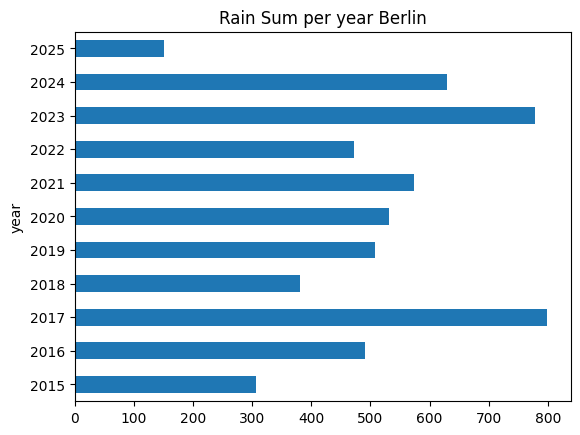

In [19]:
df_berlin.groupby('year')['rain'].sum().plot(kind='barh', title='Rain Sum per year Berlin')

In [20]:
df_berlin.groupby('year')['rain'].sum().to_frame()

,rain
year,
2015,306.2
2016,490.7
2017,798.1
2018,381.5
2019,508.0
2020,531.4
2021,574.0
2022,472.1
2023,777.8


In [21]:
combined = pd.concat([(df_berlin.groupby('year')['rain'].sum().to_frame().add_suffix('_berlin')),(df_brooklyn.groupby('year')['rain'].sum().to_frame().add_suffix('_nyc'))], axis=1)
combined.to_csv('rain_sum_year.csv') 

In [22]:
merged = pd.merge(df_berlin, df_brooklyn, on='day', suffixes=('_berlin', '_brooklyn'))

In [23]:
merged = merged.drop(['month_year_berlin', 'year_berlin', 'month_num_berlin', 'season_berlin'], axis=1)

In [24]:
(
    merged
    .rename(
        columns={
            'month_num_brooklyn' : 'month_num', 
            'season_brooklyn' : 'season', 
            'year_brooklyn' : 'year', 
            'month_year_brooklyn' : 'month_year'
        },
        inplace=True
    )
)
            

<Axes: xlabel='day', ylabel='[temperature_brooklyn]'>

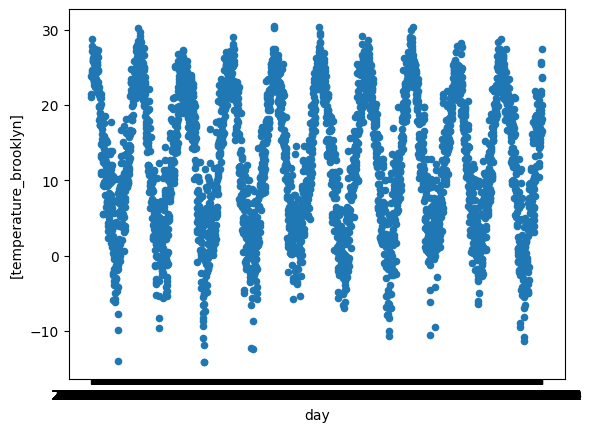

In [25]:
merged.plot(x='day', y=['temperature_brooklyn'], kind='scatter')

In [26]:
# get days with sun
merged['sunny_flag_brooklyn'] = merged['weather_description_brooklyn'].isin(['Sunny', 'Mainly sunny'])

In [27]:
merged['sunny_flag_berlin'] = merged['weather_description_berlin'].isin(['Sunny', 'Mainly sunny'])

In [28]:
merged['day'] = pd.to_datetime(merged['day'])

In [29]:
merged['is_weekend'] = merged['day'].dt.weekday >= 5
merged['is_weekend']

0       False
1       False
2       False
3        True
4        True
        ...  
3619    False
3620    False
3621    False
3622     True
3623     True
Name: is_weekend, Length: 3624, dtype: bool

In [30]:
twelve_months_ago = datetime.now() - timedelta(days=365)
five_years = datetime.now() - timedelta(days=1825)

In [31]:
merged['day'] = pd.to_datetime(merged['day'])

In [32]:
recent = merged[merged['day'] >= twelve_months_ago]

In [33]:
recent[['day', 'sunny_flag_brooklyn','weather_description_brooklyn', 'sunny_flag_berlin', 'weather_description_berlin']].to_csv('processed/sunny_days.csv')

In [34]:
merged.columns

Index(['day', 'weather_code_berlin', 'humidity_berlin', 'temperature_berlin',
       'feels_like_berlin', 'rain_berlin', 'snowfall_berlin',
       'sunshine_hours_berlin', 'daylight_hours_berlin', 'day_of_week_berlin',
       'weather_description_berlin', 'weather_code_brooklyn',
       'temperature_brooklyn', 'feels_like_brooklyn', 'snowfall_brooklyn',
       'rain_brooklyn', 'humidity_brooklyn', 'sunshine_hours_brooklyn',
       'daylight_hours_brooklyn', 'month_year', 'year', 'month_num', 'season',
       'day_of_week_brooklyn', 'weather_description_brooklyn',
       'sunny_flag_brooklyn', 'sunny_flag_berlin', 'is_weekend'],
      dtype='object')

In [35]:
merged['sun_ratio_berlin'] = merged['sunshine_hours_berlin'] / merged['daylight_hours_berlin']

In [36]:
merged['sun_ratio_brooklyn'] = merged['sunshine_hours_brooklyn'] / merged['daylight_hours_brooklyn']

In [37]:
merged['is_very_sunny_berlin'] = merged['sun_ratio_berlin'] >= 0.8

In [38]:
merged['is_very_sunny_brooklyn'] = merged['sun_ratio_brooklyn'] >= 0.8

In [39]:
recent = merged[merged['day'] >= twelve_months_ago]

In [40]:
recent[['day', 'is_very_sunny_brooklyn','is_very_sunny_berlin', 'is_weekend']].to_csv('processed/sunny_ratio.csv', index=False)

In [41]:
merged.columns

Index(['day', 'weather_code_berlin', 'humidity_berlin', 'temperature_berlin',
       'feels_like_berlin', 'rain_berlin', 'snowfall_berlin',
       'sunshine_hours_berlin', 'daylight_hours_berlin', 'day_of_week_berlin',
       'weather_description_berlin', 'weather_code_brooklyn',
       'temperature_brooklyn', 'feels_like_brooklyn', 'snowfall_brooklyn',
       'rain_brooklyn', 'humidity_brooklyn', 'sunshine_hours_brooklyn',
       'daylight_hours_brooklyn', 'month_year', 'year', 'month_num', 'season',
       'day_of_week_brooklyn', 'weather_description_brooklyn',
       'sunny_flag_brooklyn', 'sunny_flag_berlin', 'is_weekend',
       'sun_ratio_berlin', 'sun_ratio_brooklyn', 'is_very_sunny_berlin',
       'is_very_sunny_brooklyn'],
      dtype='object')

In [42]:
# sun ratio in month over 5 years

sun_ratio = merged[['day', 'month_year', 'sun_ratio_brooklyn', 'sun_ratio_berlin']]
sun_ratio.groupby('month_year')[['sun_ratio_brooklyn', 'sun_ratio_berlin']].mean().to_csv('processed/sun_ratio_month.csv')

In [43]:
merged.columns

Index(['day', 'weather_code_berlin', 'humidity_berlin', 'temperature_berlin',
       'feels_like_berlin', 'rain_berlin', 'snowfall_berlin',
       'sunshine_hours_berlin', 'daylight_hours_berlin', 'day_of_week_berlin',
       'weather_description_berlin', 'weather_code_brooklyn',
       'temperature_brooklyn', 'feels_like_brooklyn', 'snowfall_brooklyn',
       'rain_brooklyn', 'humidity_brooklyn', 'sunshine_hours_brooklyn',
       'daylight_hours_brooklyn', 'month_year', 'year', 'month_num', 'season',
       'day_of_week_brooklyn', 'weather_description_brooklyn',
       'sunny_flag_brooklyn', 'sunny_flag_berlin', 'is_weekend',
       'sun_ratio_berlin', 'sun_ratio_brooklyn', 'is_very_sunny_berlin',
       'is_very_sunny_brooklyn'],
      dtype='object')

In [44]:
# Max Temp Brooklyn
merged.describe()

,day,weather_code_berlin,humidity_berlin,temperature_berlin,feels_like_berlin,rain_berlin,snowfall_berlin,sunshine_hours_berlin,daylight_hours_berlin,weather_code_brooklyn,...,feels_like_brooklyn,snowfall_brooklyn,rain_brooklyn,humidity_brooklyn,sunshine_hours_brooklyn,daylight_hours_brooklyn,year,month_num,sun_ratio_berlin,sun_ratio_brooklyn
count,3624,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,...,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000
mean,2020-06-29 12:00:00,34.078642,74.469647,10.905684,8.254939,1.550938,0.066446,7.445771,12.246242,31.838852,...,10.564487,0.147746,3.259354,70.944536,8.268529,12.182565,2019.994481,6.522627,0.570932,0.671073
min,2015-07-15 00:00:00,0.000000,34.000000,-10.200000,-15.500000,0.000000,0.000000,0.000000,7.643347,0.000000,...,-21.500000,0.000000,0.000000,31.000000,0.000000,9.255797,2015.000000,1.000000,0.000000,0.000000
25%,2018-01-05 18:00:00,3.000000,65.000000,4.900000,0.800000,0.000000,0.000000,3.306301,9.265566,3.000000,...,0.900000,0.000000,0.000000,61.000000,5.930238,10.251308,2018.000000,4.000000,0.314068,0.507070
50%,2020-06-29 12:00:00,51.000000,76.000000,10.450000,7.500000,0.100000,0.000000,7.742596,12.260843,51.000000,...,9.800000,0.000000,0.050000,71.000000,9.055497,12.199919,2020.000000,7.000000,0.681891,0.828543
75%,2022-12-22 06:00:00,53.000000,85.000000,17.300000,15.800000,1.600000,0.000000,11.681859,15.227441,61.000000,...,21.200000,0.000000,2.800000,82.000000,11.512942,14.116317,2022.000000,10.000000,0.855926,0.904786
max,2025-06-15 00:00:00,75.000000,99.000000,30.000000,29.900000,107.000000,10.500000,15.440569,16.840067,75.000000,...,35.000000,30.730000,106.200000,100.000000,14.000000,15.088556,2025.000000,12.000000,0.920463,0.933679
std,NaN,27.154736,13.175797,7.662755,9.107074,3.657435,0.389847,4.787672,3.114575,28.376388,...,11.784433,1.299204,7.551140,13.444685,4.140845,1.996175,2.893447,3.462832,0.318575,0.309464


In [45]:
weekends = recent[recent['is_weekend'] == True]
weekends.to_csv('processed/weekend.csv', index=True)

In [46]:
# rainy days per month -- makes no sense because of snow

merged['rain_day_berlin'] = merged['rain_berlin'] >= 1

In [47]:
merged['rain_day_brooklyn'] = merged['rain_brooklyn'] >= 1

In [48]:
#Trying a wordcloud for fun woth Chat GPT

text_berlin = ', '.join(merged['weather_description_berlin'].dropna().astype(str))
text_brooklyn = ', '.join(merged['weather_description_berlin'].dropna().astype(str))

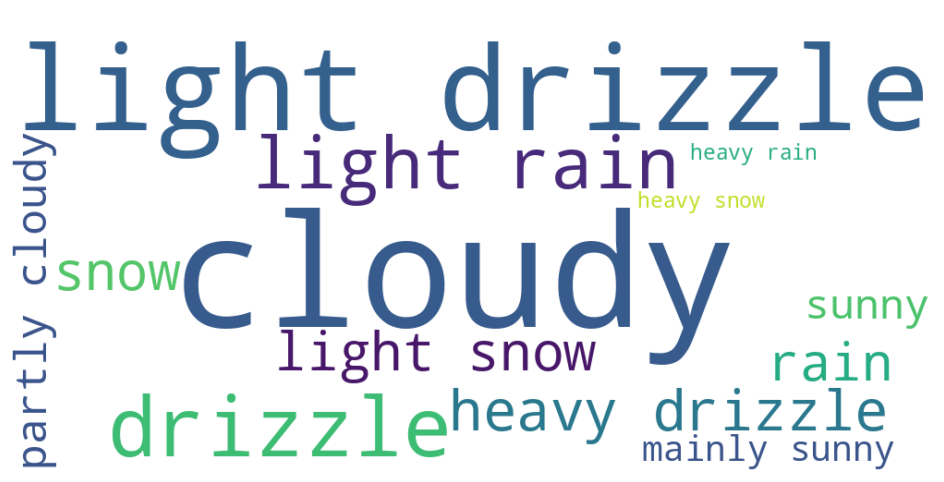

In [49]:



# Step 1: Normalize the text
words = text_berlin.split(',')                     # split at commas
words = [w.strip().lower() for w in words]      # remove whitespace and lowercase

# Step 2 (optional): inspect unique values
unique_words = sorted(set(words))
# print(unique_words)  # check if there are still duplicates like 'cloudy ' or 'cloudy\n'

# Step 3: Count frequencies
word_counts = Counter(words)

# Step 4: Generate word cloud
wordcloud = WordCloud(
    width=1000, height=500,
    background_color='white'
).generate_from_frequencies(word_counts)

# Step 5: Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

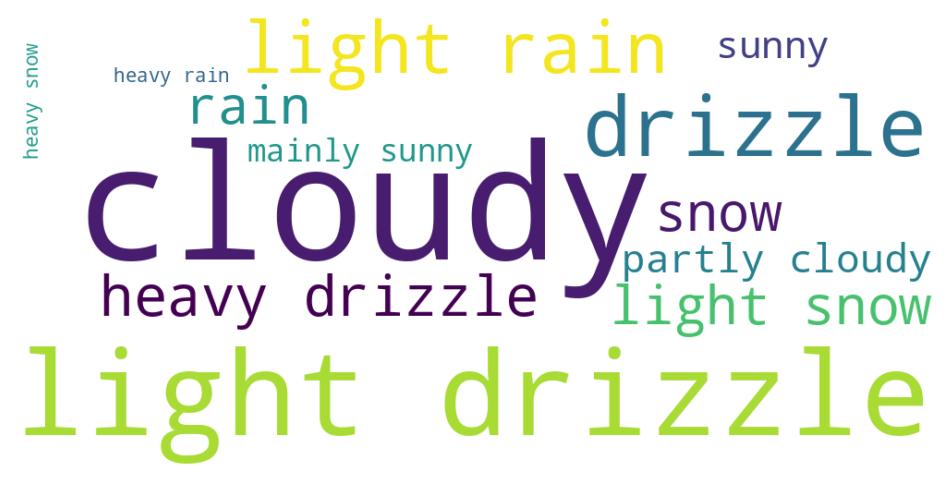

In [50]:

# Step 1: Normalize the text
words = text_brooklyn.split(',')                     # split at commas
words = [w.strip().lower() for w in words]      # remove whitespace and lowercase

# Step 2 (optional): inspect unique values
unique_words = sorted(set(words))
# print(unique_words)  # check if there are still duplicates like 'cloudy ' or 'cloudy\n'

# Step 3: Count frequencies
word_counts = Counter(words)

# Step 4: Generate word cloud
wordcloud = WordCloud(
    width=1000, height=500,
    background_color='white'
).generate_from_frequencies(word_counts)

# Step 5: Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
merged.to_csv('processed/weather_fulldata.csv')